### House Price Prediction

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

In [2]:
# load data
data = pd.read_csv('california_housing_datset.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# checking data distribution and five number summery
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# checking null values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# replacing the null values 

<Axes: >

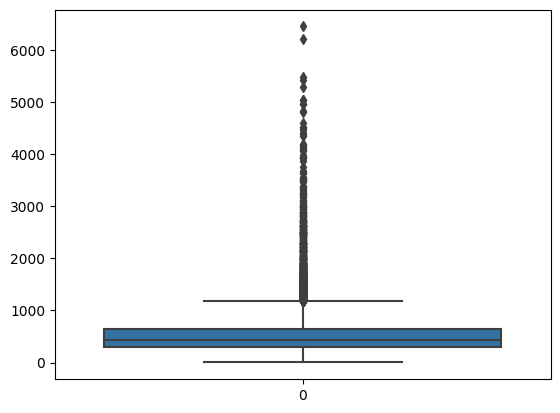

In [10]:
import seaborn as sns
sns.boxplot(data['total_bedrooms'])

In [13]:
# There are outliers so we will replace it by median

median = data['total_bedrooms'].median()
median

435.0

In [14]:
data['total_bedrooms'].fillna(median, inplace=True )

In [15]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19822,-119.48,36.44,22.0,1389.0,290.0,1185.0,271.0,2.0857,49200.0,INLAND
18839,-122.73,41.76,19.0,2200.0,414.0,950.0,367.0,2.5357,94200.0,INLAND
2307,-119.76,36.83,17.0,3690.0,628.0,1888.0,601.0,4.0196,84200.0,INLAND
9026,-118.86,34.07,16.0,1409.0,244.0,970.0,172.0,8.0144,500001.0,NEAR OCEAN
20087,-120.33,38.00,14.0,1944.0,330.0,822.0,314.0,3.5000,170700.0,INLAND
6769,-118.15,34.10,52.0,4325.0,823.0,1927.0,795.0,3.9485,419100.0,<1H OCEAN
3096,-117.73,35.73,35.0,2916.0,594.0,1870.0,432.0,3.6250,55000.0,INLAND
5022,-118.33,33.99,46.0,1582.0,315.0,777.0,286.0,3.2083,149600.0,<1H OCEAN
16345,-121.35,38.03,8.0,1904.0,255.0,895.0,242.0,5.7201,155700.0,INLAND
8107,-118.21,33.80,44.0,1387.0,280.0,984.0,302.0,4.2500,143100.0,NEAR OCEAN


column "ocean_proximity" in string value so we need to impute with numerical

In [17]:
# check number of unique values in each column
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

For enconding (categorical to numerical) following methods we can use
1. Pandas get dummies
2. sklearn Labelencoder

In [ ]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 500)

In [19]:
# apply label encoder on required columns
# import label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # object

In [20]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [21]:
# use labelencoder on "ocean_proximity"
# Fit 
le.fit(data['ocean_proximity'])

LabelEncoder()

In [22]:
# fit transform
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

In [24]:
# check data
data['ocean_proximity'].sample(10)

19285    0
2388     1
17799    0
3168     1
10392    0
6359     1
719      3
8372     0
3967     0
8757     4
Name: ocean_proximity, dtype: int32

In [26]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14339,-117.17,32.73,52.0,1578.0,487.0,879.0,446.0,2.4069,215000.0,4
5833,-118.32,34.20,36.0,1978.0,337.0,834.0,311.0,3.9866,294400.0,0
2414,-119.43,36.59,15.0,1371.0,306.0,1266.0,309.0,1.7670,63300.0,1
19216,-122.68,38.48,15.0,1575.0,262.0,716.0,259.0,5.3409,244600.0,0
17651,-121.88,37.26,13.0,1893.0,487.0,1018.0,464.0,3.8047,204700.0,0
11497,-118.07,33.67,13.0,5126.0,711.0,2429.0,718.0,9.5268,437900.0,4
13631,-117.33,34.07,32.0,2086.0,458.0,1355.0,412.0,2.5238,89200.0,1
3019,-119.42,35.19,26.0,890.0,172.0,483.0,170.0,4.1500,68200.0,1
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,126100.0,1
3975,-118.62,34.20,29.0,2421.0,402.0,1120.0,388.0,5.0309,244800.0,0


In [27]:
# split data in X and Y
X = data.drop(columns='median_house_value')

In [29]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [30]:
y = data['median_house_value'].copy()
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [32]:
y.shape, X.shape # both should be same rows

((20640,), (20640, 9))

In [33]:
# Perform train-test spliting
# X > xtrain, xtest
# y > ytrain, ytest

In [34]:
# Manual spliting
xtrain, xtest = X[0:15000], X[15000:]
ytrain, ytest = y[0:15000], y[15000:]

In [35]:
xtrain.shape

(15000, 9)

In [36]:
ytrain.shape

(15000,)

In [37]:
xtest.shape

(5640, 9)

In [38]:
ytest.shape

(5640,)

In [39]:
# apply model : Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [42]:
# checking model functions
dir(lr_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'positive',
 'predict',
 'score',
 'set_params']

In [43]:
# Applying model on training data
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [44]:
lr_model.intercept_

-3074421.175745495

In [45]:
lr_model.coef_

array([-3.79547858e+04, -4.04309796e+04,  8.84103669e+02, -5.99901903e+00,
        7.28302177e+01, -4.55422000e+01,  9.52595633e+01,  3.96606110e+04,
       -4.45184409e+03])

In [47]:
# lets predict xtest

pred = lr_model.predict(xtest)

In [48]:
pred

array([206892.61154297, 152865.88475588, 132304.69807169, ...,
        27452.64909269,  39704.42434514,  55353.2177015 ])

In [52]:
pred_df = pd.DataFrame(pred)

In [53]:
pred_df.head() # predicted values

,0
0,206892.611543
1,152865.884756
2,132304.698072
3,202561.226061
4,182612.902211


In [51]:
ytest.head() # actual values

15000    140700.0
15001    119200.0
15002    132000.0
15003    144000.0
15004    142900.0
Name: median_house_value, dtype: float64

In [59]:
# checking error

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [57]:
# Training data error 
pred_train = lr_model.predict(xtrain)

mse= mean_squared_error(ytrain, pred_train )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(ytrain, pred_train )
print('R2:',r2) 

mae= mean_absolute_error(ytrain, pred_train )
print('MAE:', mae)

MSE: 4630907059.814928
RMSE: 68050.76825293692
R2: 0.6298685134417221
MAE: 49492.631239802555


In [58]:
# Testing data error 
pred_test = lr_model.predict(xtest)

mse= mean_squared_error(ytest, pred_test )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(ytest, pred_test )
print('R2:',r2) 

mae= mean_absolute_error(ytest, pred_test )
print('MAE:', mae)

MSE: 5914547369.735899
RMSE: 76906.09449020213
R2: 0.6000914933254162
MAE: 54833.76794785434
